In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-dataset/customer_churn_data.csv


Hello, I would like to use this data to accurately predict the 'Churn' value through data analysis and binary classification. Please note that some content is in Korean as I am Korean (this is still in progress).

### 패키지 임포트

In [2]:
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt     
import seaborn as sns       
import matplotlib.gridspec as gridspec 
%matplotlib inline

### 전체 컬럼, 로우 다 보이게 설정

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. 탐색적 데이터 분석 (EDA : Exploratory Data Analysis)

### 데이터 불러오기

In [4]:
train = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_data.csv')

In [5]:
target = train['Churn']

### 데이터 확인

In [6]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [7]:
train.shape

(5880, 21)

### 변수 이름 설명

customerID: 각 고객의 고유 식별자.

gender: 고객의 성별 (남성, 여성).

SeniorCitizen: 고객이 고령자인지 여부 (1: 예, 0: 아니오).

Partner: 고객이 배우자가 있는지 여부 (예, 아니오).

Dependents: 고객이 부양가족이 있는지 여부 (예, 아니오).

tenure: 고객이 회사와 함께한 개월 수.

PhoneService: 고객이 전화 서비스를 이용하는지 여부 (예, 아니오).

MultipleLines: 고객이 여러 회선을 이용하는지 여부 (예, 아니오, 전화 서비스 없음).

InternetService: 고객이 이용하는 인터넷 서비스 유형 (DSL, 광섬유, 없음).

OnlineSecurity: 고객이 온라인 보안을 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음).

OnlineBackup: 고객이 온라인 백업을 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음).

DeviceProtection: 고객이 장치 보호를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음).

TechSupport: 고객이 기술 지원을 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음).

StreamingTV: 고객이 스트리밍 TV를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음).

StreamingMovies: 고객이 스트리밍 영화를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음).

Contract: 고객의 계약 기간 (월별, 1년, 2년).

PaperlessBilling: 고객이 무지 페이퍼 청구서를 이용하는지 여부 (예, 아니오).

PaymentMethod: 고객의 결제 방법 (전자 수표, 우편 수표, 은행 이체, 신용 카드).

MonthlyCharges: 고객에게 매월 청구되는 금액.

TotalCharges: 고객에게 총 청구된 금액.

Churn: 고객이 이탈했는지 여부 (예, 아니오).

### 피처요약표

In [8]:
def resumetable(train):
    print(f'데이터셋 형상: {train.shape}')
    summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처 이름'})
    summary['결측값 개수'] = train.isnull().sum().values
    summary['빈 문자열 존재 여부'] = train.apply(lambda x : x.eq('').any()).values
    summary['고윳값 개수'] = train.nunique().values
    summary['첫 번째 값'] = train.loc[0].values
    summary['두 번째 값'] = train.loc[1].values
    summary['세 번째 값'] = train.loc[2].values
    return summary

resumetable(train)

데이터셋 형상: (5880, 21)


,피처 이름,데이터 타입,결측값 개수,빈 문자열 존재 여부,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,customerID,object,0,False,5880,CUST0000,CUST0001,CUST0002
1,gender,object,0,False,2,Male,Female,Male
2,SeniorCitizen,int64,0,False,2,0,0,1
3,Partner,object,0,False,2,No,Yes,No
4,Dependents,object,0,False,2,Yes,No,No
5,tenure,int64,0,False,72,23,43,51
6,PhoneService,object,0,False,2,No,No,Yes
7,MultipleLines,object,0,False,3,No phone service,No phone service,No
8,InternetService,object,0,False,3,No,DSL,DSL
9,OnlineSecurity,object,0,False,3,No internet service,Yes,No


### 칼럼 통계치 확인

In [9]:
round(train.describe(), 2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.0,5880.00,5880.00,5880.00
mean,0.5,36.55,70.16,2566.81
std,0.5,20.91,28.80,1910.02
min,0.0,1.00,20.00,20.03
25%,0.0,18.00,45.72,1020.22
50%,1.0,37.00,70.16,2136.44
75%,1.0,55.00,95.46,3767.66
max,1.0,72.00,119.99,8589.60


# 1-1 데이터 시각화

### 타겟값(Churn) 분포

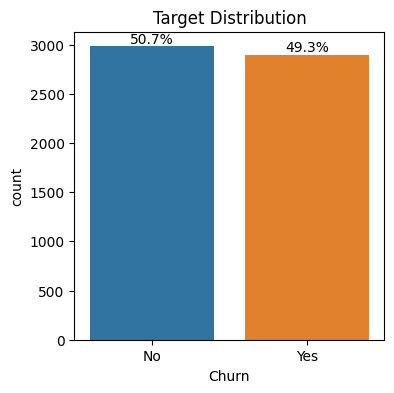

In [10]:
plt.figure(figsize=(4,4))

ax = sns.countplot(x='Churn', data=train)
ax.set_title('Target Distribution')

total = len(train)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

### 이진피처 시각화

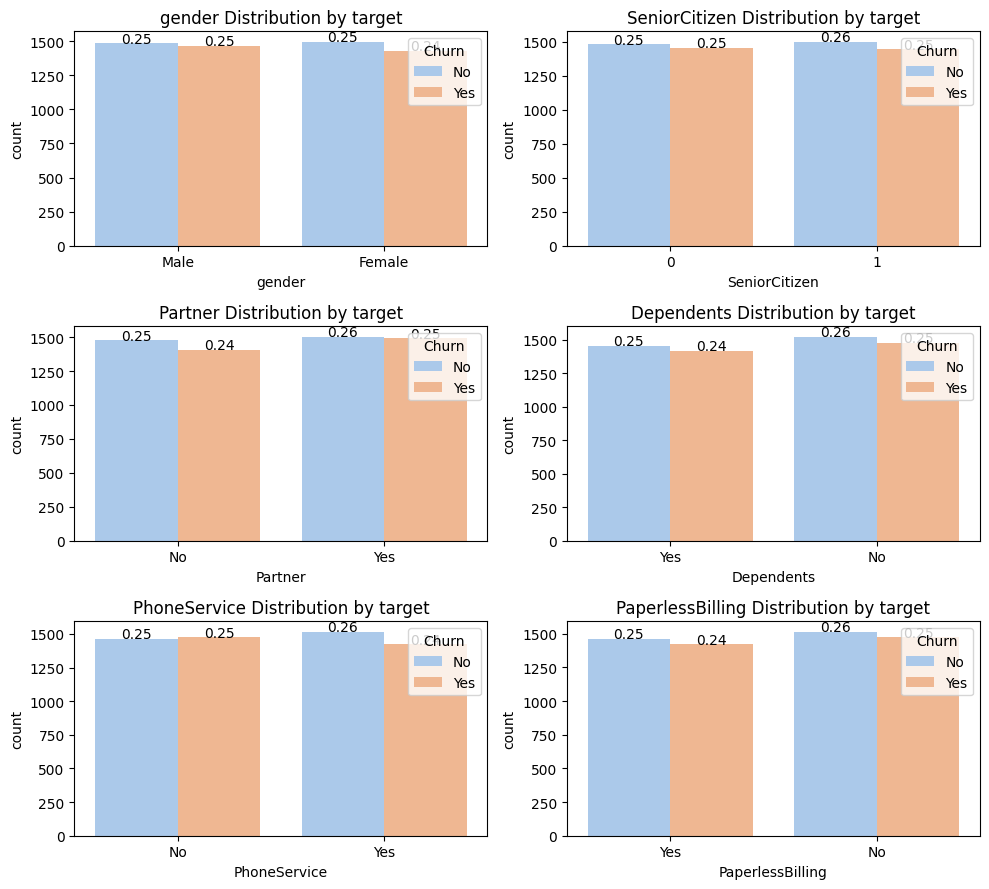

In [11]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
palette = sns.color_palette("pastel")

# bin_0부터 bin_4까지 반복
bins = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for i, bin in enumerate(bins):
    # 행과 열 계산
    row = i // 2
    col = i % 2

    ax = sns.countplot(x=bin,
                       hue='Churn',
                       data=train,
                       ax=axes[row, col],
                       palette='pastel')

    # 각 막대에 대한 비율 표시
    total = len(train[bin])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}'.format(height/total), ha="center")

    # 각 그래프 제목 표시
    ax.set_title(f'{bin} Distribution by target')

# 마지막 subplot 위치에 있는 빈 차트 제거
if len(bins) % 2 != 0:
    figure.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

### 범주형 피처 시각화

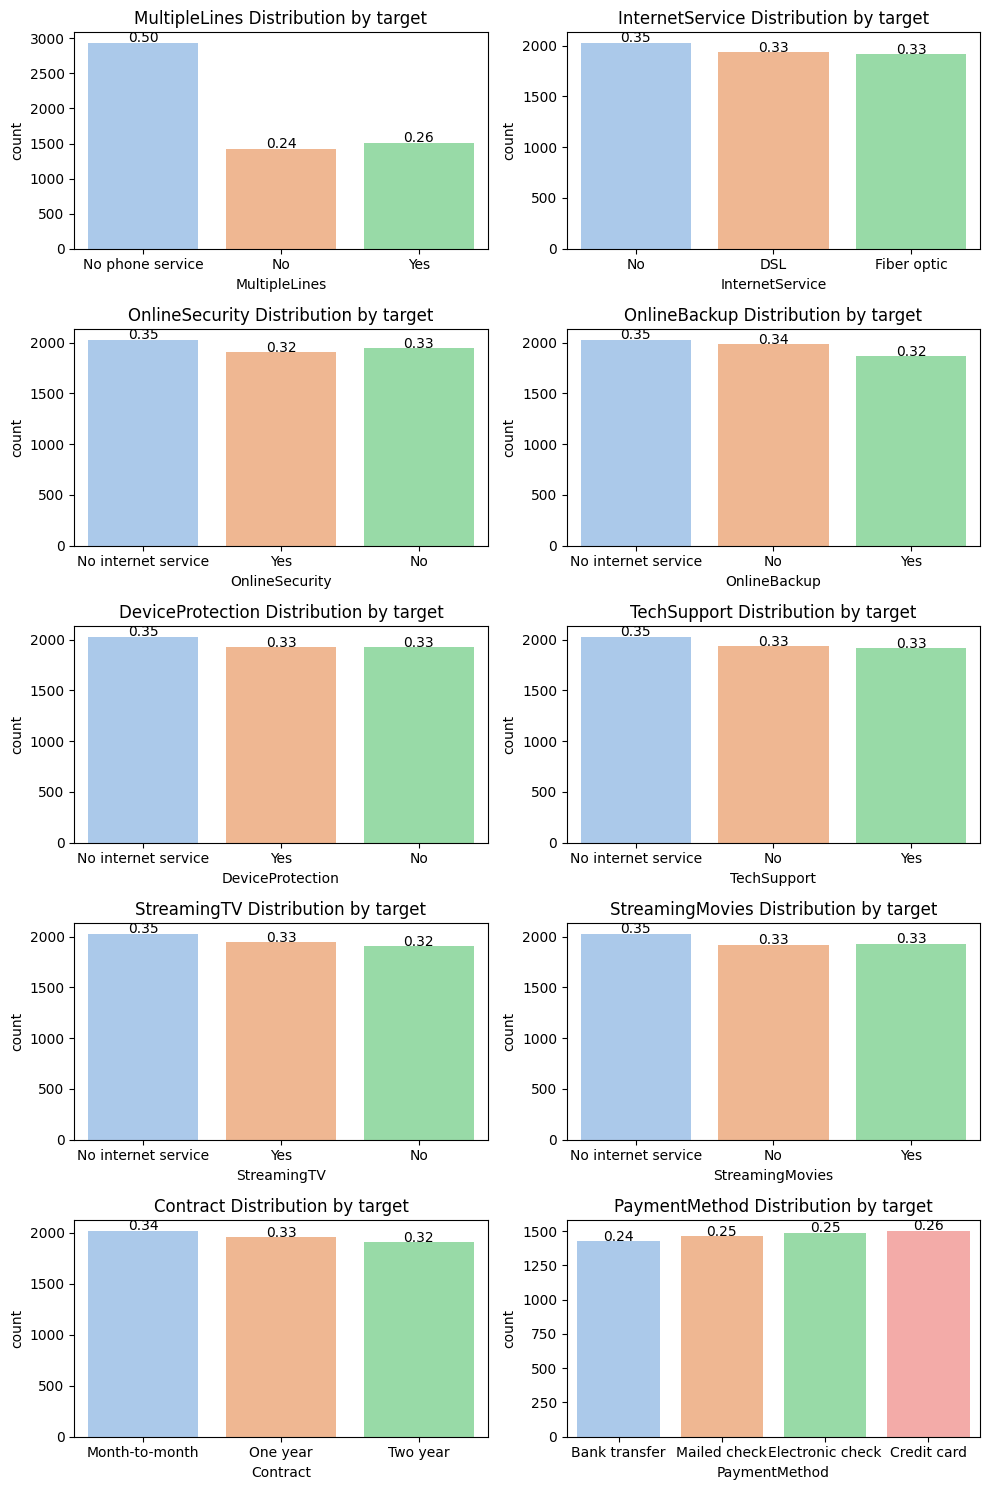

In [12]:
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
palette = sns.color_palette("pastel")

bins = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

for i, bin in enumerate(bins):
    # 행과 열 계산
    row = i // 2
    col = i % 2

    ax = sns.countplot(x=bin,
                       data=train,
                       ax=axes[row, col],
                       palette='pastel')

    # 각 막대에 대한 비율 표시
    total = len(train[bin])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}'.format(height/total), ha="center")

    # 각 그래프 제목 표시
    ax.set_title(f'{bin} Distribution by target')

# 마지막 subplot 위치에 있는 빈 차트 제거
if len(bins) % 2 != 0:
    figure.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

### 연속형 피처 시각화

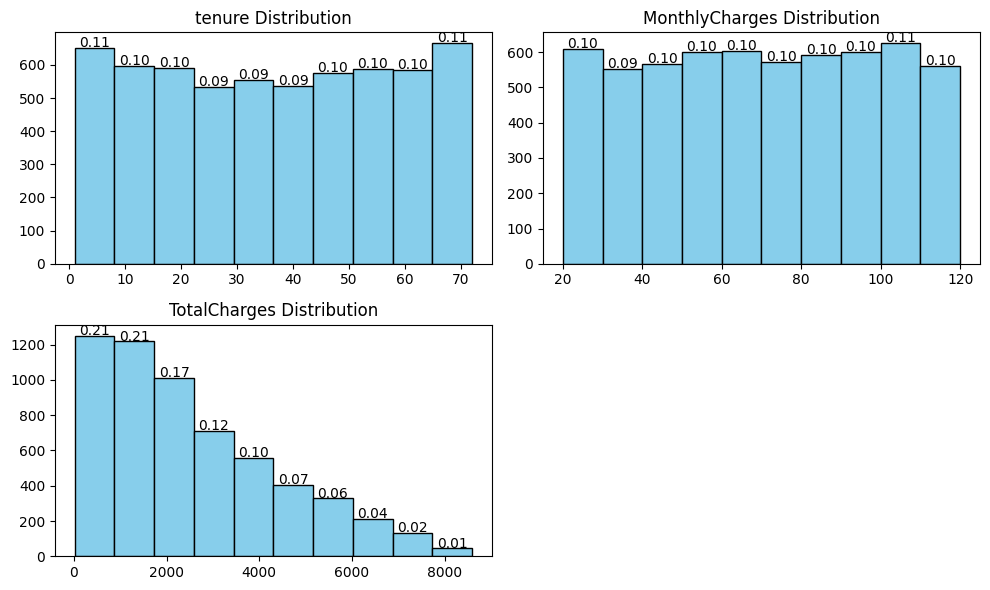

In [13]:
feature = ['tenure','MonthlyCharges','TotalCharges']

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for i, bin in enumerate(feature):
    # 행과 열 계산
    row = i // 2
    col = i % 2

    # ax.hist를 사용하여 히스토그램 그리기
    ax = axes[row, col]
    ax.hist(x=train[bin], bins=10, color='skyblue', edgecolor='black')

    # 각 막대에 대한 비율 표시
    total = len(train[bin])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}'.format(height/total), ha="center")

    # 각 그래프 제목 표시
    ax.set_title(f'{bin} Distribution')

# 마지막 subplot 위치에 있는 빈 차트 제거
if len(feature) % 2 != 0:
    figure.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

데이터 인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder

# 각 컬럼에 대해 반복하면서 LabelEncoder 적용
for column in train:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,22,0,1,2,1,1,1,1,1,1,0,1,0,1302,1602,0
1,1,0,0,1,0,42,0,1,0,2,0,2,0,2,0,0,0,3,3579,4691,1
2,2,1,1,0,0,50,1,0,0,0,2,2,2,0,0,1,0,2,3423,5007,1
3,3,1,1,0,0,71,1,2,0,2,0,2,0,0,0,0,0,1,3614,5698,0
4,4,1,1,0,0,24,1,2,0,0,0,0,2,0,2,0,0,2,1425,1832,1


### 피처 상관성 히트맵

<Axes: >

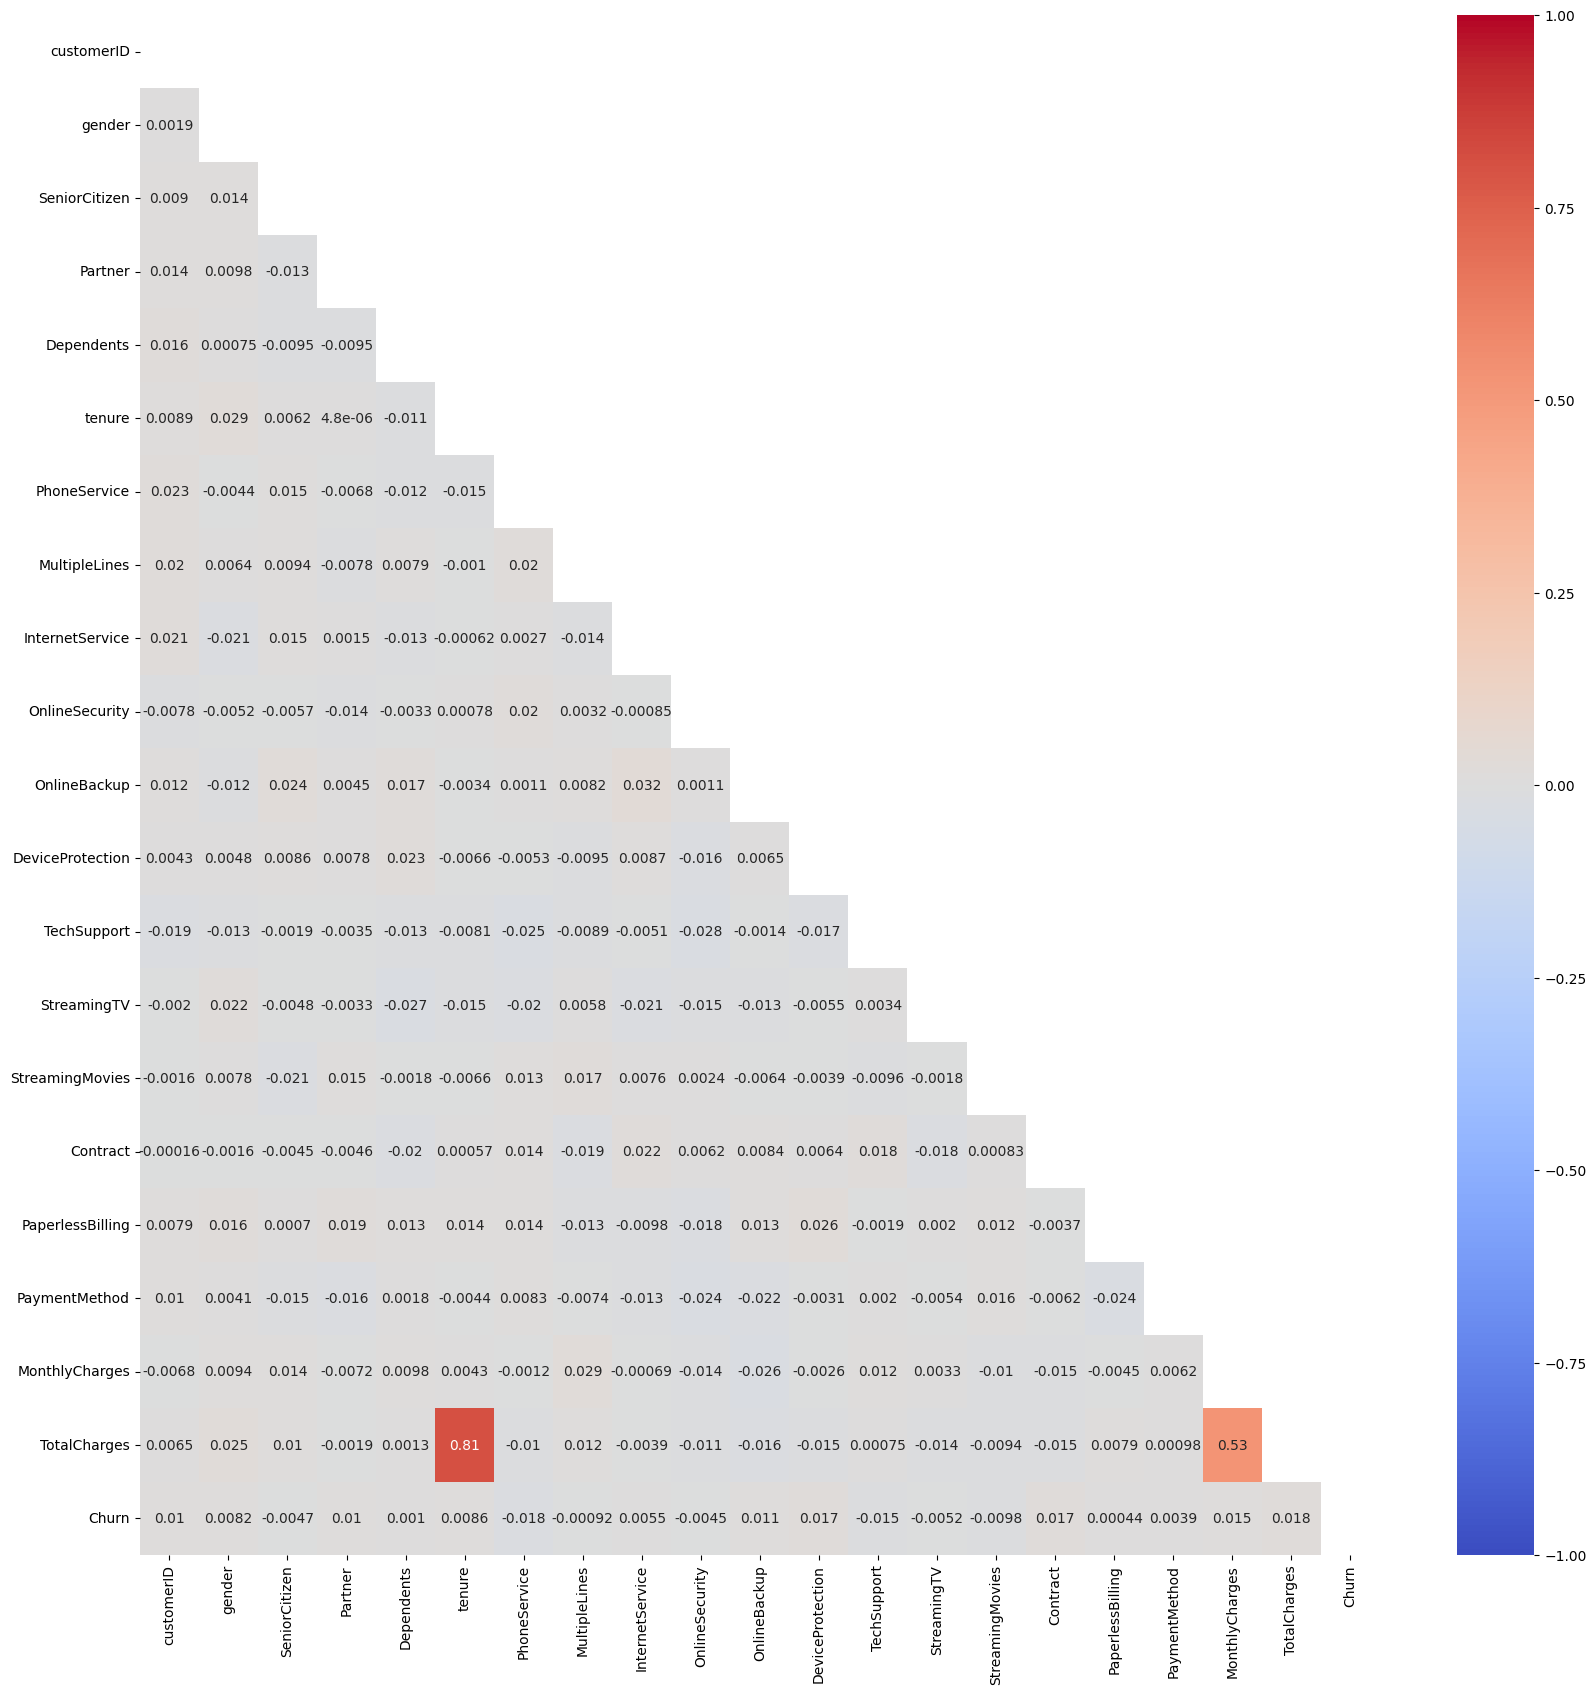

In [15]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

plt.figure(figsize=(20,20))

sns.heatmap(train.corr(),
             mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

# 2. 데이터 전처리

In [16]:
train = train[['Churn','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','PaymentMethod']]

### 데이터셋 나누기

In [17]:
from sklearn.model_selection import train_test_split    # 데이터셋 나누는 라이브러리

X = train.drop('Churn', axis = 1) # 데이터셋에서 종속변수 제거 후 저장하고 싶을 때
y = train['Churn'] # 종속변수

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, shuffle=True,random_state=42)

### 데이터 표준화

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()    # 표준화 지정
# scaler = RobustScaler()      # 로버스트 스케일링 지정
# # scaler = MinMaxScaler()      # min-max 정규화 지정

X_train = scaler.fit_transform(X_train)
X_val= scaler.transform(X_val)

# 데이터 모델링

In [19]:

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import lightgbm as lgb


### 하이퍼 파라미터 정의

In [20]:
search_spaces = {
    'LightGBM': {'model': lgb.LGBMClassifier(verbose=-1),
                 'params': {'learning_rate': Real(0.01, 0.2, 'log-uniform'),  # 핵심 하이퍼 파라미터
                            'n_estimators': Integer(100, 1000),  # 핵심 하이퍼 파라미터
                            'max_depth': Integer(1, 15),  # 핵심 하이퍼 파라미터, -1은 무제한을 의미
                            'num_leaves': Integer(31, 70)}}
}

In [21]:
from sklearn.model_selection import StratifiedKFold
best_models = {}

stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, config in search_spaces.items():
    optimizer = BayesSearchCV(
        estimator=config['model'],
        search_spaces=config['params'],
        n_iter=20,
        cv=stratified_k_fold,
        n_jobs=-1,
        scoring='accuracy'
    )
    optimizer.fit(X, y)

    best_models[model_name] = optimizer.best_estimator_

    print(f'{model_name}')
    print(f'최적 파라미터: {optimizer.best_params_}')
    print(f'점수: {optimizer.best_score_}')

LightGBM
최적 파라미터: OrderedDict([('learning_rate', 0.013638754307341773), ('max_depth', 2), ('n_estimators', 326), ('num_leaves', 48)])
점수: 0.5151360544217687


### 모델 학습

In [22]:
best_params = optimizer.best_params_
model = lgb.LGBMClassifier(**best_params, verbose=-1)


model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.013638754307341773, max_depth=2,
               n_estimators=326, num_leaves=48, verbose=-1)

### 모델 예측

In [23]:
 preds = model.predict(X_val)

# 모델 평가

[[489 385]
 [542 348]]
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       874
           1       0.47      0.39      0.43       890

    accuracy                           0.47      1764
   macro avg       0.47      0.48      0.47      1764
weighted avg       0.47      0.47      0.47      1764



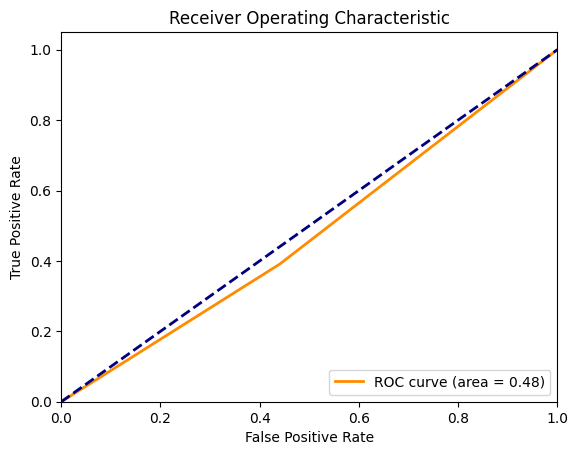

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 혼동행렬과 분류 보고서 출력
print(confusion_matrix(y_val, preds))
print(classification_report(y_val, preds))

# ROC 커브와 AUC 계산
fpr, tpr, thresholds = roc_curve(y_val, preds)  # preds_proba는 모델이 예측한 확률입니다. 이진 분류에서는 양성 클래스에 대한 확률을 사용해야 합니다.
roc_auc = roc_auc_score(y_val, preds)  # ROC AUC 점수 계산

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

데이터의 분포들이 다 균등해서 정확도를 가리는 포인트를 찾는 것이 쉽지않아 보인다 변별력이 없는 데이터인 것 같다